<a href="https://colab.research.google.com/github/Carusof24/FFNSampling/blob/main/caruso_numerical_sols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

In [ ]:
lambda1=np.array([[1,0,0],[0,-1,0],[0,0,-2]])

print(lambda1)

#Create diagonal matrix with eigenvalues of A, the first must be positive for stability, the others negative

[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -2]]


In [ ]:
l = 1 # lambda's first eigenvalue
N = 3 #numbers of nodes
beta = 1 / np.sqrt(N)
gam = (beta**2) / 8 # (diego dixit) I impose it this way because I want solutions with delta greater than zero
x = np.zeros(N)
print (gam)
# equilibrium fixed points
x[0]=0
x[1]= (beta*l + np.sqrt(beta**2*l**2-4*gam))/2
x[2]= (beta*l - np.sqrt(beta**2*l**2-4*gam))/2

print(x[1],x[2])
# I calculate the rate functions at the equilibrium points because then they will be the eigenvectors of the phi matrix
f1=x[1]**2/(gam+x[1]**2)
f2=x[2]**2/(gam+x[2]**2)

print(f1,f2)

0.04166666666666668
0.49279927982674443 0.08455098936288138
0.8535533905932737 0.14644660940672624


In [ ]:
#create phi matrix and then its inverse with the first column being my "attractor," linear combination of rate functions at fixed points

first_column = np.array([f1, f1, f2])
#second_column = np.random.randn(3)
#third_column = np.random.randn(3)
second_column = np.array([0,1,0])
third_column = np.array([0,0,1])

phi = np.column_stack((first_column, second_column, third_column))

# matrix of eigenvectors of A
print(phi)


[[0.85355339 0.         0.        ]
 [0.85355339 1.         0.        ]
 [0.14644661 0.         1.        ]]


In [ ]:
#inverse of phi
phi_=np.linalg.inv(phi)
print(phi_)

[[ 1.17157288  0.          0.        ]
 [-1.          1.          0.        ]
 [-0.17157288  0.          1.        ]]


In [ ]:
# Identity verification
prova = phi @ phi_
print("phi @ phi_:")
print(prova)

phi @ phi_:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
#adjacency matrix calculation
A_at = phi @ lambda1 @ phi_

print(A_at)

[[ 1.          0.          0.        ]
 [ 2.         -1.          0.        ]
 [ 0.51471863  0.         -2.        ]]


In [ ]:
N = 3  # Num nodes
x0 = np.ones(N)  # Initial conditions array length N with all 1

#x0=np.array([x[1],x[1],x[2]])#+np.random.randn(3), Try starting on attractor and putting a little bit of noise

dt = 0.03  # delta t
Iter = 300  # Iterations
A= A_at

def rate(x):
  return x**2 / (gam + x**2)

def deriv(x, A, N):
    dxdt = -x + (1 / np.sqrt(N)) * (A @ rate(x))
    return dxdt

def euler_method(A, N, x0, dt, Iter):
    x_old = np.array(x0)
    x_values = [x_old.copy()]  # history of sols to memorize
    for k in range(Iter):
        dxdt = deriv(x_old, A, N)
        x_new = x_old + dxdt * dt
        x_old = x_new
        x_values.append(x_new.copy())  # Save values
    return np.array(x_values)  # Returns values to plot

# Solving the differential equation.
x_values = euler_method(A, N, x0, dt, Iter)

# time vector
T_values = np.arange(0, (Iter + 1) * dt, dt)

# print result
print("Final values of x after integration:")
print(x_values)

Final values of x after integration:
[[1.         1.         1.        ]
 [0.98662769 0.98662769 0.94530321]
 [0.97363841 0.97363841 0.89239562]
 [0.96102053 0.96102053 0.8412449 ]
 [0.94876273 0.94876273 0.79182302]
 [0.93685408 0.93685408 0.74410673]
 [0.92528398 0.92528398 0.69807802]
 [0.91404215 0.91404215 0.65372471]
 [0.90311862 0.90311862 0.61104106]
 [0.89250374 0.89250374 0.57002839]
 [0.88218817 0.88218817 0.53069576]
 [0.87216284 0.87216284 0.49306045]
 [0.86241898 0.86241898 0.4571483 ]
 [0.85294808 0.85294808 0.42299358]
 [0.8437419  0.8437419  0.39063826]
 [0.83479245 0.83479245 0.36013027]
 [0.82609201 0.82609201 0.3315206 ]
 [0.81763308 0.81763308 0.30485882]
 [0.80940841 0.80940841 0.28018718]
 [0.80141096 0.80141096 0.2575336 ]
 [0.79363393 0.79363393 0.23690443]
 [0.78607071 0.78607071 0.21827819]
 [0.77871493 0.77871493 0.20160187]
 [0.77156038 0.77156038 0.18679064]
 [0.76460108 0.76460108 0.17373143]
 [0.75783122 0.75783122 0.16228947]
 [0.75124517 0.75124517 0.1

Valori finali di x dopo l'integrazione:
[0.49339634 0.49339634 0.08457523]


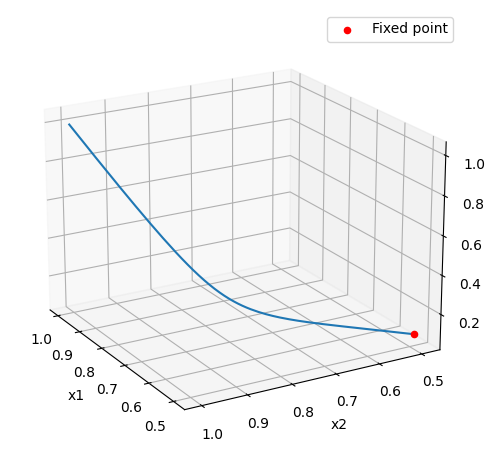

In [ ]:
def rate(x):
    return x**2 / (gam + x**2)

def deriv(x, A, N):
    dxdt = -x + (1 / np.sqrt(N)) * (A @ rate(x))
    return dxdt

def euler_method(A, N, x0, dt, Iter):
    x_old = np.array(x0)
    x_values = [x_old.copy()]  # Storico delle soluzioni
    for k in range(Iter):
        dxdt = deriv(x_old, A, N)
        x_new = x_old + dxdt * dt
        x_old = x_new
        x_values.append(x_new.copy())  # Salva i valori
    return np.array(x_values)  # Ritorna i valori per il plot

# Risoluzione dell'equazione differenziale
x_values = euler_method(A, N, x0, dt, Iter)

# Vettore del tempo
T_values = np.arange(0, (Iter + 1) * dt, dt)

# Stampa del risultato finale
print("Valori finali di x dopo l'integrazione:")
print(x_values[-1])

# Plot delle traiettorie nello spazio delle fasi 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Impostare la vista 3D per avere il sistema di riferimento desiderato
ax.view_init(elev=20, azim=150)  # Regolare gli angoli di elevazione e azimut per ottenere la vista desiderata

# Regolare le etichette degli assi per essere leggibili
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel('x1', rotation=0)
ax.set_ylabel('x2', rotation=0)
ax.set_zlabel('x3', rotation=90)
ax.plot(x_values[:, 0], x_values[:, 1], x_values[:, 2])
ax.scatter(x_values[-1, 0], x_values[-1, 1], x_values[-1, 2], color='red', label='Fixed point')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.tight_layout()
#ax.set_title('Evolution of the system towards fixed point')
ax.legend()
plt.show()

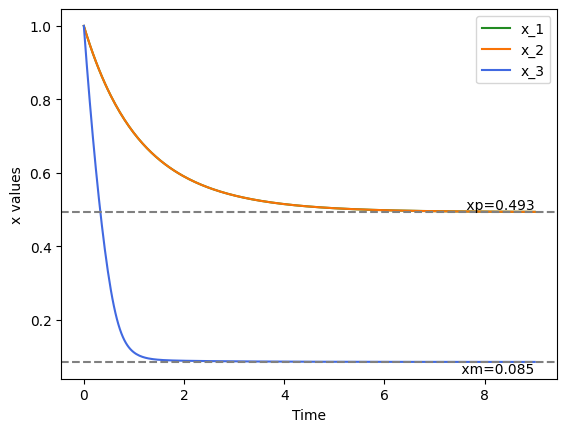

In [ ]:
colors = ['forestgreen', '#F97306', 'royalblue']

# plot the deterministic case of ODE SOLutions
for i in range(N):
    plt.plot(T_values, x_values[:, i],color=colors[i], label=f'x_{i+1}')

plt.axhline(y=x[1], color='grey', linestyle='--')
plt.axhline(y=x[2], color='grey', linestyle='--')
# Adding text annotations
plt.text(T_values[-1], x[1], f' xp={x[1]:.3f}', verticalalignment='bottom', horizontalalignment='right', color='black')
plt.text(T_values[-1], x[2], f' xm={x[2]:.3f}', verticalalignment='top', horizontalalignment='right', color='black')
plt.xlabel('Time')
plt.ylabel('x values')
plt.legend()
#plt.title('Differential equation solution')
plt.show()


In [ ]:
# I create diagonal noise matrix B with off diagonal term at zero, then i will generalize this B matrix noise and i will see if everything works
B=np.array([[3,0,0],[0,4,0],[0,0,5]])

print(B)


[[3 0 0]
 [0 4 0]
 [0 0 5]]


Final values of x after integration:
[0.49935404 0.48325827 0.0850916 ]


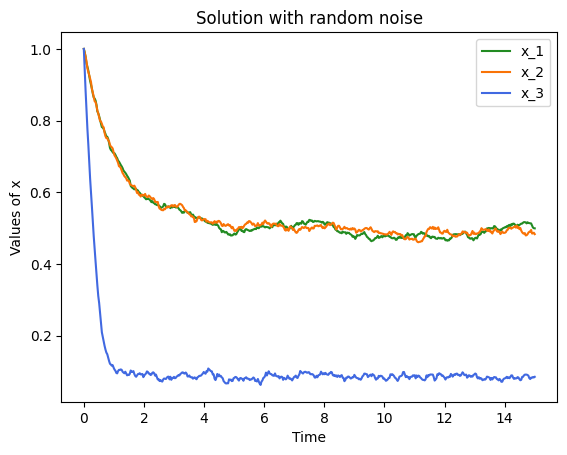

In [ ]:
# Parameters for the Euler method
x0 = np.ones(N)  # Initial conditions, array of length N with all ones
dt = 0.03  # Delta t
Iter = 500  # Number of iterations

# Define the noise term Prova con rumore Random
epsilon = 0.01  # Noise intensity 0.05

def rate(x):
    return x**2 / (gam + x**2)

#Implementation of Euler_Maruyama method due the presence of noise

def deriv(x, A, N, dt, epsilon, B):
    noise_term = epsilon * np.sqrt(dt) * np.sqrt(B) @ np.random.randn(N)
    dxdt = (-x + (1 / np.sqrt(N)) * (A @ rate(x)))* dt + noise_term
    return dxdt

def Euler_Maruyama_method(A, N, x0, dt, Iter, epsilon, B):
    x_old = np.array(x0)
    x_values = [x_old.copy()]  # Store the history of solutions
    for k in range(Iter):
        dxdt = deriv(x_old, A, N, dt, epsilon, B)
        x_new = x_old + dxdt
        x_old = x_new
        x_values.append(x_new.copy())  # Save values
    return np.array(x_values)  # Return values for plotting

# Solve the differential equation
x_values = Euler_Maruyama_method(A_at, N, x0, dt, Iter, epsilon, B)

# Time vector
T_values = np.arange(0, (Iter + 1) * dt, dt)

# Print the results
print("Final values of x after integration:")
print(x_values[-1])


# plot the solutions of the stochastic case
for i in range(N):
    plt.plot(T_values, x_values[:, i],color=colors[i], label=f'x_{i+1}')

plt.xlabel('Time')
plt.ylabel('Values of x')
plt.legend()
plt.title("Solution with random noise")
plt.show()


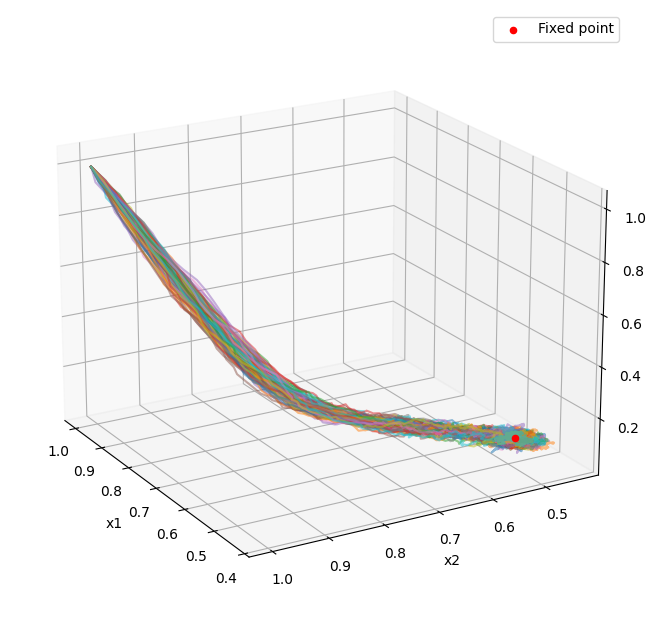

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parametri per la simulazione
N = 3  # Numero di variabili
x0 = np.ones(N)  # Condizioni iniziali, array di lunghezza N con tutti uno
dt = 0.03  # Passo di integrazione
Iter = 500  # Numero di iterazioni
epsilon = 0.01  # Intensità del rumore

# Punto fisso
punto_fisso = np.array([0.49279927982674443, 0.49279927982674443, 0.08455098936288138])

# Esecuzione delle 100 repliche
num_repliche = 100
traiettorie = []

for _ in range(num_repliche):
    x_values = Euler_Maruyama_method(A_at, N, x0, dt, Iter, epsilon, B)
    traiettorie.append(x_values)

# Vettore del tempo
T_values = np.arange(0, (Iter + 1) * dt, dt)

# Grafico nello Spazio delle Fasi 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for traj in traiettorie:
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], alpha=0.5)  # Traccia delle traiettorie

# Punto fisso
ax.scatter(punto_fisso[0], punto_fisso[1], punto_fisso[2], color='red', label='Fixed point')
# Impostare la vista 3D per avere il sistema di riferimento desiderato
ax.view_init(elev=20, azim=150)  # Regolare gli angoli di elevazione e azimut per ottenere la vista desiderata



# Regolare le etichette degli assi per essere leggibili
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel('x1', rotation=0)
ax.set_ylabel('x2', rotation=0)
ax.set_zlabel('x3', rotation=90)


ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.legend()

plt.show()

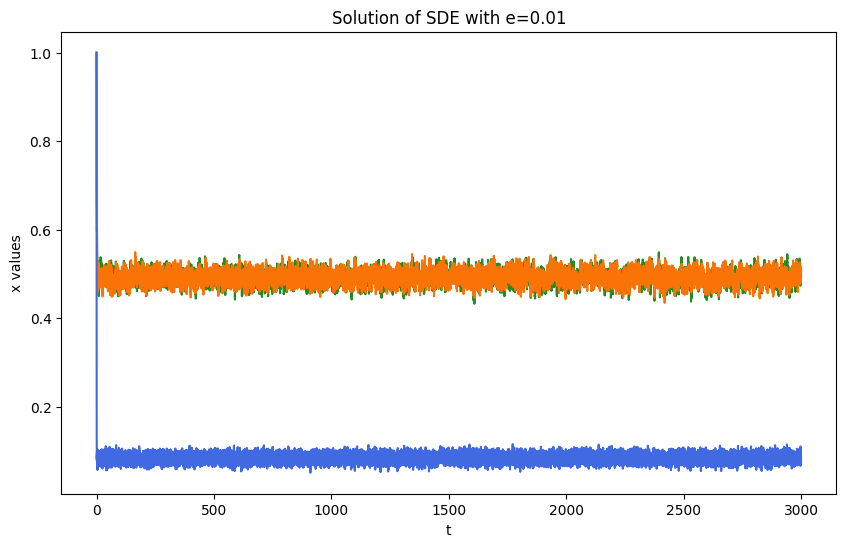

In [ ]:
# I redo the same euler-mayurama integration, greatly increasing the number of iterations to be sure to extract fluctuations due to stochastic noise around the deterministic solution
epsilon = 0.01
Iter = 100000
def deriv(x, A, N, dt, epsilon, B):
    noise_term = epsilon * np.sqrt(dt) * np.sqrt(B) @ np.random.randn(N)
    dxdt = (-x + (1 / np.sqrt(N)) * (A @ rate(x)))*dt + noise_term
    return dxdt

def euler_method(A, N, x0, dt, Iter, epsilon, B):
    x_old = np.array(x0)
    x_values = [x_old.copy()]  # history of sols da memorizzare
    for k in range(Iter):
        dxdt = deriv(x_old, A, N, dt, epsilon, B)
        x_new = x_old + dxdt
        x_old = x_new
        x_values.append(x_new.copy())  # to store values
    return np.array(x_values)  # give me the values for the plot

# solution with epsilon = 0.01

x_values = euler_method(A_at, N, x0, dt, Iter, epsilon, B)

# time vector
T_values = np.arange(0, (Iter + 1) * dt, dt)

# plot
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(T_values, x_values[:, i],color=colors[i])

plt.xlabel('t')
plt.ylabel('x values')
plt.title("Solution of SDE with e=0.01") #SDE---> stochastic ordinary differential equations
plt.show()


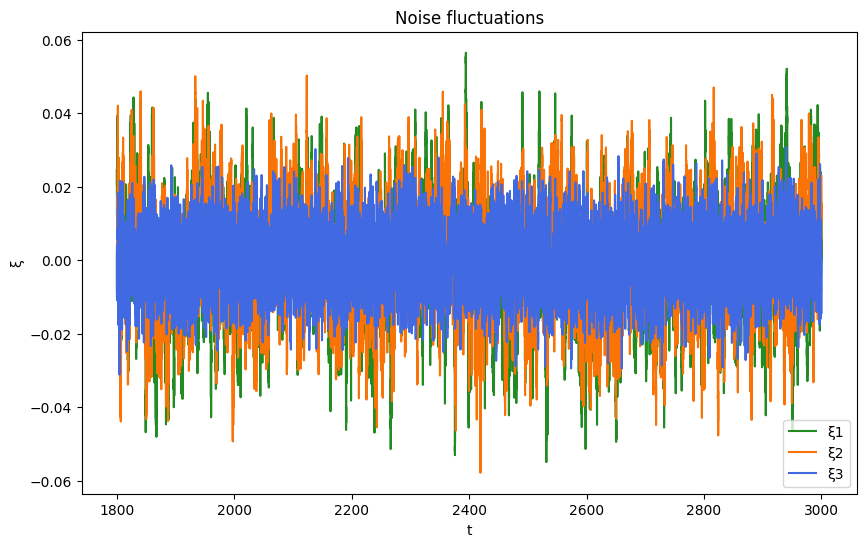

In [ ]:
# To observe noise fluctuations

# Associate fixed points with their respective nodes
x_e = np.array([x[1], x[1], x[2]])

# Select time t' (for example, 60% of the total time)
t_prime_fraction = 0.6
t_prime = int(Iter * t_prime_fraction) #This time t_prime will be used as the starting point to analyze the fluctuations.

# I define in the fllowing way the fluctuations \xi and i Calculate \csi = xi - xe starting from t'
csi = x_values[t_prime:] - x_e

# Time vector starting from t'
T_values = np.arange(t_prime, Iter + 1) * dt

# Visualize results starting from t'
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(T_values, csi[:, i], color=colors[i], label=f'ξ{i+1}')

plt.xlabel('t')
plt.ylabel('ξ')
plt.title("Noise fluctuations")
plt.legend()
plt.show()


In [ ]:
print(csi) # to check what comes out

[[ 0.01682011  0.00383018  0.00964488]
 [ 0.01629826  0.00177158  0.01024881]
 [ 0.01954761 -0.0011197   0.00035774]
 ...
 [ 0.01191608  0.02328317 -0.00514104]
 [ 0.0096053   0.02417333 -0.00497379]
 [ 0.0093213   0.02489754 -0.0004753 ]]


In [ ]:
#We compute various statistical properties of the fluctuations csi
#Finally, we print out the calculated variances and correlations between the components ξ1, ξ2, and ξ3, as well as their mean values.
#These statistics provide insight into the characteristics and relationships of the noise fluctuations in the system.
# Calculate the moments of fluctuations
mu_csi1 = np.mean(csi[:,0])
mu_csi2 = np.mean(csi[:,1])
mu_csi3 = np.mean(csi[:,2])
# Calculate the variance of each ξ
var_csi1 = np.var(csi[:, 0]) / (epsilon**2)
var_csi2 = np.var(csi[:, 1]) / (epsilon**2)
var_csi3 = np.var(csi[:, 2]) / (epsilon**2)

# Calculate the correlation between ξ1 and ξ2, ξ2 and ξ3, ξ1 and ξ3
sig_csi12 = np.mean(csi[:, 0] * csi[:, 1]) / (epsilon**2)
sig_csi23 = np.mean(csi[:, 1] * csi[:, 2]) / (epsilon**2)
sig_csi13 = np.mean(csi[:, 0] * csi[:, 2]) / (epsilon**2)

print("Variance of ξ1:", var_csi1)
print("Variance of ξ2:", var_csi2)
print("Variance of ξ3:", var_csi3)
print("Correlation between ξ1 and ξ2:", sig_csi12)
print("Correlation between ξ2 and ξ3:", sig_csi23)
print("Correlation between ξ1 and ξ3:", sig_csi13)

print("mean of ξ1", mu_csi1)
print("mean of ξ2", mu_csi2)
print("mean of ξ3", mu_csi3)


Variance of ξ1: 2.3354135432318492
Variance of ξ2: 2.089024039972573
Variance of ξ3: 0.6208526441146531
Correlation between ξ1 and ξ2: 0.7816555743228353
Correlation between ξ2 and ξ3: 0.012990094758531108
Correlation between ξ1 and ξ3: 0.08461420467442585
mean of ξ1 -0.0007259318871809695
mean of ξ2 -1.3801578082602728e-05
mean of ξ3 -1.0358082104371282e-05


##FIRST CHECK These are the ones found with the analytical procedure for comparison:
##### 2.12132034
#####1.82898878
#####0.568485
#####0.6225599
#####0.0164454
#####0.06244584


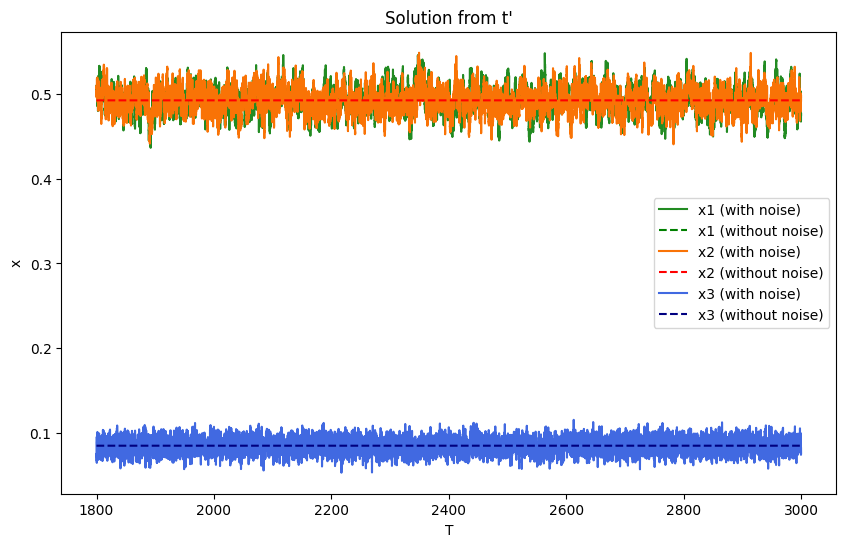

Covariance matrix of ξ:
[[2.34462049 0.70450839 0.06573424]
 [0.70450839 1.96599929 0.02968441]
 [0.06573424 0.02968441 0.62421737]]


In [ ]:
# Solve the differential equation with epsilon = 0.01
x_values_with_noise = euler_method(A_at, N, x0, dt, Iter, epsilon, B)

# Solve the differential equation with epsilon = 0 (no noise)
x_values_without_noise = euler_method(A_at, N, x0, dt, Iter, 0, B)

# Select time t' (60% of the total time)
t_prime_fraction = 0.6
t_prime = int(Iter * t_prime_fraction)

# Extract values of x starting from t'
x_post_t_prime_with_noise = x_values_with_noise[t_prime:]
x_post_t_prime_without_noise = x_values_without_noise[t_prime:]

# Time vector starting from t'
T_values = np.arange(t_prime, Iter + 1) * dt

# Visualize results starting from t'
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(T_values, x_post_t_prime_with_noise[:, i], color=colors[i], label=f'x{i+1} (with noise)')
    color = ['green', 'red', 'navy']
    plt.plot(T_values, x_post_t_prime_without_noise[:, i], color=color[i], linestyle='--', label=f'x{i+1} (without noise)')

plt.xlabel('T')
plt.ylabel('x')
plt.title("Solution from t'")
plt.legend()
plt.show()

# Calculate \xi = xi - x1m starting from t'
xi = x_post_t_prime_with_noise - x_post_t_prime_without_noise.mean(axis=0)

# Calculate the covariance matrix of \xi
cov_matrix = np.cov(xi, rowvar=False) / epsilon**2

print("Covariance matrix of ξ:")
print(cov_matrix)


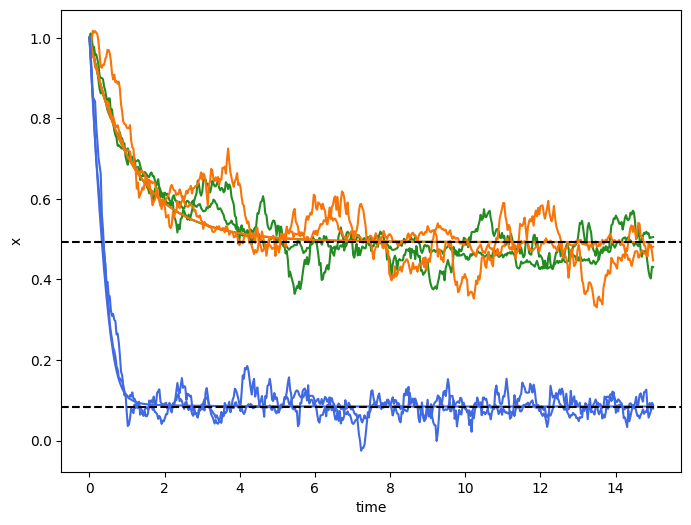

In [ ]:
# Testing different epsilon values
# Parameters for Euler's method
x0 = np.ones(N)  # Initial conditions, an array of length N with all ones
dt = 0.03  # Time step
Iter = 500  # Number of iterations

def deriv(x, A, N, dt, epsilon, B):
    noise_term = epsilon * np.sqrt(dt) * np.sqrt(B) @ np.random.randn(N)
    dxdt = (-x + (1 / np.sqrt(N)) * (A @ rate(x))) * dt + noise_term
    return dxdt

def euler_method(A, N, x0, dt, Iter, epsilon, B):
    x_old = np.array(x0)
    x_values = [x_old.copy()]  # History of solutions to store
    for k in range(Iter):
        dxdt = deriv(x_old, A, N, dt, epsilon, B)
        x_new = x_old + dxdt
        x_old = x_new
        x_values.append(x_new.copy())  # Save values
    return np.array(x_values)  # Returns values for plotting

# Define different epsilon values
epsilons = [0, 0.02, 0.05]

# Solving the differential equation for each epsilon
results = {}
for epsilon in epsilons:
    x_values = euler_method(A_at, N, x0, dt, Iter, epsilon, B)
    results[epsilon] = x_values

# Time vector
T_values = np.arange(0, (Iter + 1) * dt, dt)

# Visualization of results
plt.figure(figsize=(8, 6))
for i in range(N):
    for epsilon in epsilons:
        plt.plot(T_values, results[epsilon][:, i], color=colors[i])

plt.axhline(y=x[1], color='black', linestyle='--')
plt.axhline(y=x[2], color='black', linestyle='--')
# Adding text annotations
#plt.text(T_values[-1], x[1], f' xp={x[1]:.3f}', verticalalignment='bottom', horizontalalignment='right', color='black')
#plt.text(T_values[-1], x[2], f' xm={x[2]:.3f}', verticalalignment='top', horizontalalignment='right', color='black')

plt.xlabel('time')
plt.ylabel('x')
#plt.title("Solution of the differential equation with various noise levels")
plt.show()



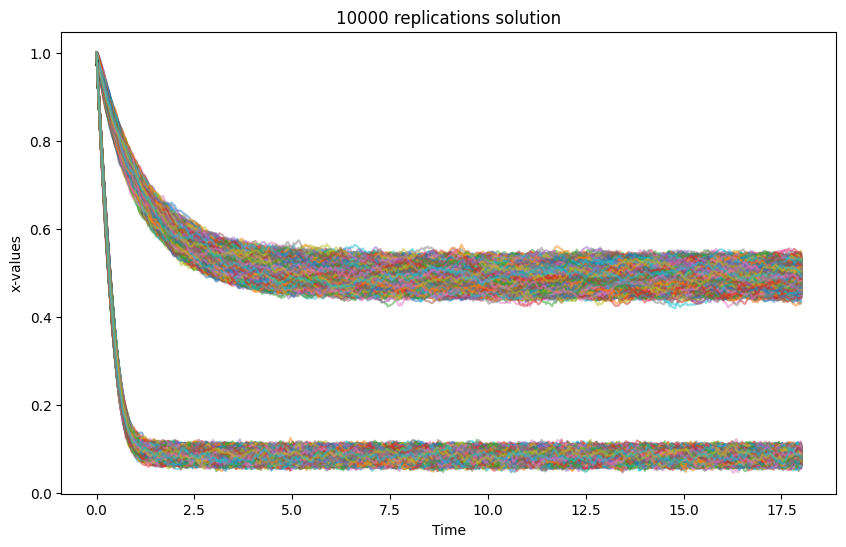

In [ ]:
M=10000# I do many realizations to see how the xi's are distributed at a certain time
# list to store the results of 10000 realizations
x_values_list = []

# Running the simulation 10000 times
for _ in range(M):
    # sol with epsilon 0.1
    epsilon = 0.01
    x_values = euler_method(A_at, N, x0, dt, Iter, epsilon, B)
    x_values_list.append(x_values)

# Convert the list to an array np
x_values_array = np.array(x_values_list)

T_values = np.arange(0, (Iter + 1) * dt, dt)

# plot
plt.figure(figsize=(10, 6))
for i in range(N):
    for j in range(M):
        plt.plot(T_values, x_values_array[j, :, i], alpha=0.5)

plt.xlabel('Time')
plt.ylabel('x-values')
plt.title("10000 replications solution")
plt.show()


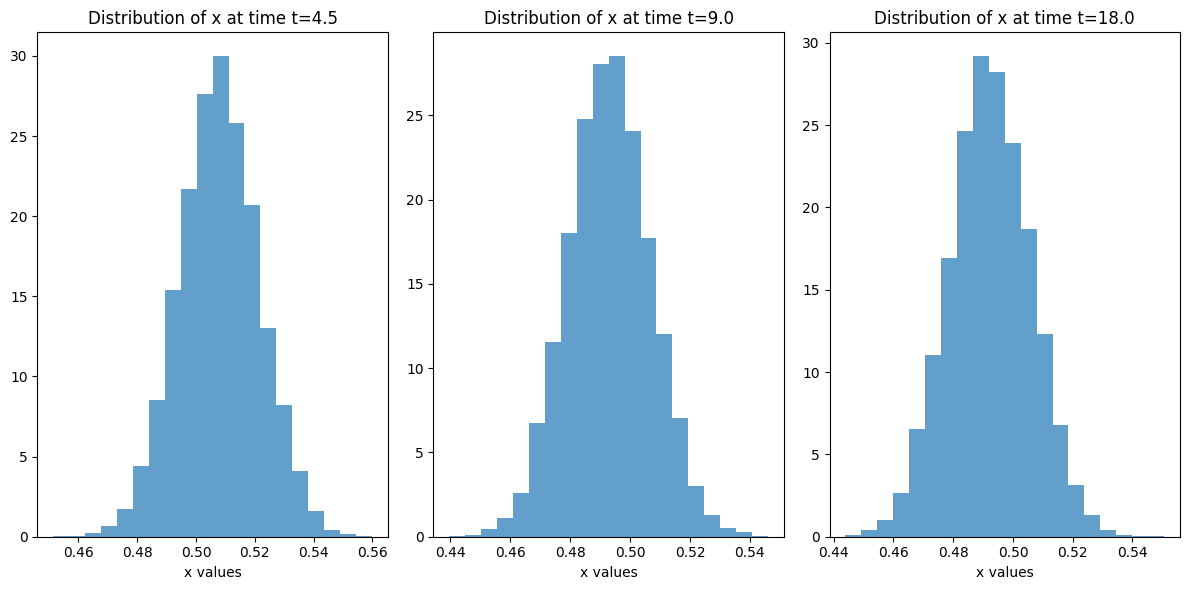

In [ ]:
# at multiple times
desired_times = [int(Iter / 4), int(Iter / 2), int(Iter * 4 / 4)]  # at 1/4, 1/2, and end of simulation

# Empty vector to store the distribution of x at a specific time
x_distributions = []

# Extract values of x for the chosen times and for a specific node
for t_index in desired_times:
    x_at_t = x_values_array[:, t_index, 1]  # Extracts the x of the second node at time t_index
    x_distributions.append(x_at_t)

# Histogram of the distributions of x for each time.
plt.figure(figsize=(12, 6))

for i, t_index in enumerate(desired_times):
    plt.subplot(1, len(desired_times), i + 1)
    plt.hist(x_distributions[i], bins=20, density=True, alpha=0.7)
    plt.xlabel('x values')
    plt.title(f'Distribution of x at time t={t_index * dt}')

plt.tight_layout()
plt.show()


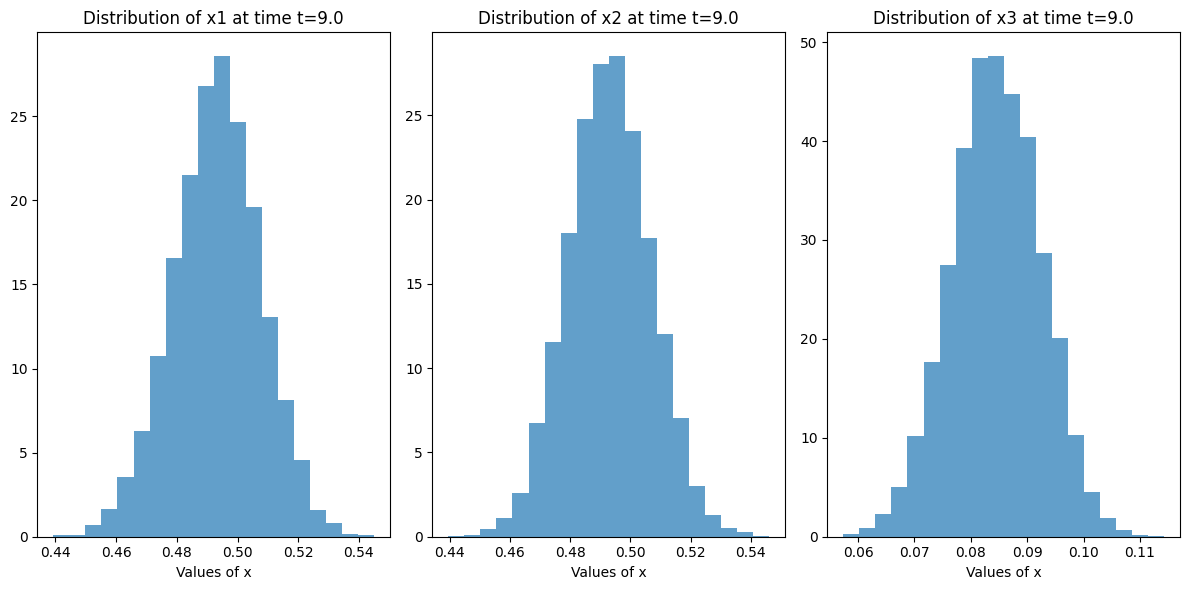

In [ ]:
t_index = int(Iter / 2)  # halfway through the simulation
t = t_index * dt

# Extract all x values of all three nodes at a certain time t
x_at_t_node1 = x_values_array[:, t_index, 0]  # Extracts x values of the first node
x_at_t_node2 = x_values_array[:, t_index, 1]  # Extracts x values of the second node
x_at_t_node3 = x_values_array[:, t_index, 2]  # Extracts x values of the third node

# Make a histogram of the distribution of x for each node
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(x_at_t_node1, bins=20, density=True, alpha=0.7)
plt.xlabel('Values of x')
plt.title(f'Distribution of x1 at time t={t}')

plt.subplot(1, 3, 2)
plt.hist(x_at_t_node2, bins=20, density=True, alpha=0.7)
plt.xlabel('Values of x')
plt.title(f'Distribution of x2 at time t={t}')

plt.subplot(1, 3, 3)
plt.hist(x_at_t_node3, bins=20, density=True, alpha=0.7)
plt.xlabel('Values of x')
plt.title(f'Distribution of x3 at time t={t}')

plt.tight_layout()
plt.show()


In [ ]:
# Extract all possible final x-values for all 1000 replications.
valori_finali_x = x_values_array[:, -1, :]


print("Final x values for all 1000 replications:")
print(valori_finali_x)


Final x values for all 1000 replications:
[[0.4717494  0.49402    0.08116202]
 [0.51020259 0.49909858 0.08398091]
 [0.47992788 0.46697213 0.09335329]
 ...
 [0.48779419 0.47206814 0.08026545]
 [0.49319688 0.50428558 0.08719535]
 [0.50685797 0.49346918 0.08216047]]


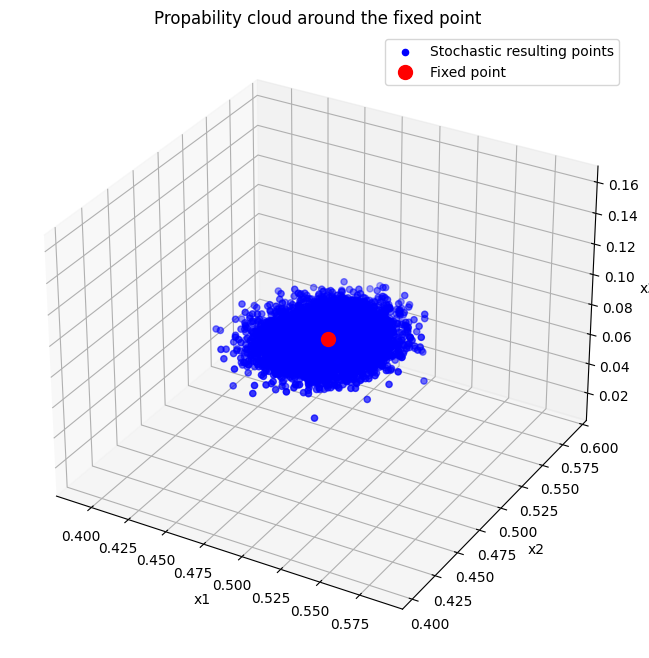

In [ ]:

# I want to calculate the propability cloud around the fixed point of coordinate [x1,x1,x2]

# 3D figure creation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extraction of x1, x2, x3 for each replica.
x1 = valori_finali_x[:, 0]
x2 = valori_finali_x[:, 1]
x3 = valori_finali_x[:, 2]
# Coordinate the fixed point
punto_fisso = np.array([0.49279927982674443, 0.49279927982674443, 0.08455098936288138])

# Plot of end points for each replica
ax.scatter(x1, x2, x3, c='blue', marker='o', label = 'Stochastic resulting points', zorder=1)
plt.plot(x[1], x[1], x[2], "o", markersize=10.0, color='r', label='Fixed point', zorder=3)



# margins and and limits for a plot to improve visualization
margin = 0.05
x1_min, x1_max = x1.min() - margin, x1.max() + margin
x2_min, x2_max = x2.min() - margin, x2.max() + margin
x3_min, x3_max = x3.min() - margin, x3.max() + margin

#axis of the plot
ax.set_xlim(max(0, x1_min), min(1, x1_max))
ax.set_ylim(max(0, x2_min), min(1, x2_max))
ax.set_zlim(max(0, x3_min), min(1, x3_max))

# label
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Propability cloud around the fixed point')
plt.legend()


plt.show()


In [ ]:
M = 1000  # Number of realizations to observe the distribution of xi's at a certain time

# List to store the results of 1000 realizations
x_values_list = []

# Running the simulation 1000 times
for _ in range(M):
    epsilon = 0.01  # Epsilon value for the simulation
    Iter = 1000  # Number of iterations
    x_values = euler_method(A_at, N, x0, dt, Iter, epsilon, B)  # Performing Euler method simulation
    x_values_list.append(x_values)  # Storing simulation results

# Convert the list to a numpy array
x_values_array = np.array(x_values_list)

T_values = np.arange(0, (Iter + 1) * dt, dt)  # Time values

# Extract final values of x for all 1000 replications
final_x_values = x_values_array[:, -1, :]

# Define fixed points x_e for respective nodes
x_e = np.array([x[1], x[1], x[2]])

# Select time t' (e.g., 60% of total time)
t_prime_fraction = 0.6
t_prime = int(x_values_array.shape[1] * t_prime_fraction)

# Calculate \xi = xi - xe starting from t'
csi = x_values_array[:, t_prime:, :] - x_e.reshape(1, 1, -1)

# Compute variance of each component \xi
var_csi1 = np.var(csi[:, :, 0]) / (epsilon**2)
var_csi2 = np.var(csi[:, :, 1]) / (epsilon**2)
var_csi3 = np.var(csi[:, :, 2]) / (epsilon**2)

# Compute correlations between \xi1 and \xi2, \xi2 and \xi3, \xi1 and \xi3
sig_csi12 = np.mean(csi[:, :, 0] * csi[:, :, 1]) / (epsilon**2)
sig_csi23 = np.mean(csi[:, :, 1] * csi[:, :, 2]) / (epsilon**2)
sig_csi13 = np.mean(csi[:, :, 0] * csi[:, :, 2]) / (epsilon**2)

# Compute standard error of variance for each component
SE_var_csi1 = np.sqrt(var_csi1**2 / ( (M)))
SE_var_csi2 = np.sqrt(var_csi2**2 / ( (M)))
SE_var_csi3 = np.sqrt(var_csi3**2 / ( (M)))

# Compute standard error of correlations for each pair
SE_corr_csi12 = np.sqrt((sig_csi12**2) / (M))
SE_corr_csi23 = np.sqrt((sig_csi23**2) / (M))
SE_corr_csi13 = np.sqrt((sig_csi13**2) / (M))

# Print results
print(f"Variance of csi1: {var_csi1}")
print(f"Variance of csi2: {var_csi2}")
print(f"Variance of csi3: {var_csi3}")
print(f"Standard error of variance of csi1: {SE_var_csi1}")
print(f"Standard error of variance of csi2: {SE_var_csi2}")
print(f"Standard error of variance of csi3: {SE_var_csi3}")
print(f"Correlation between csi1 and csi2: {sig_csi12}")
print(f"Correlation between csi2 and csi3: {sig_csi23}")
print(f"Correlation between csi1 and csi3: {sig_csi13}")
print(f"Standard error of correlation between csi1 and csi2: {SE_corr_csi12}")
print(f"Standard error of correlation between csi2 and csi3: {SE_corr_csi23}")
print(f"Standard error of correlation between csi1 and csi3: {SE_corr_csi13}")



Variance of csi1: 2.1365539487129914
Variance of csi2: 1.85272831444559
Variance of csi3: 0.6101262972893983
Standard error of variance of csi1: 0.0675637682175963
Standard error of variance of csi2: 0.058588413591327056
Standard error of variance of csi3: 0.019293887597995156
Correlation between csi1 and csi2: 0.6313845148557682
Correlation between csi2 and csi3: 0.016865462362596714
Correlation between csi1 and csi3: 0.06240256533956992
Standard error of correlation between csi1 and csi2: 0.01996613146304646
Standard error of correlation between csi2 and csi3: 0.0005333327485765021
Standard error of correlation between csi1 and csi3: 0.001973342383105196


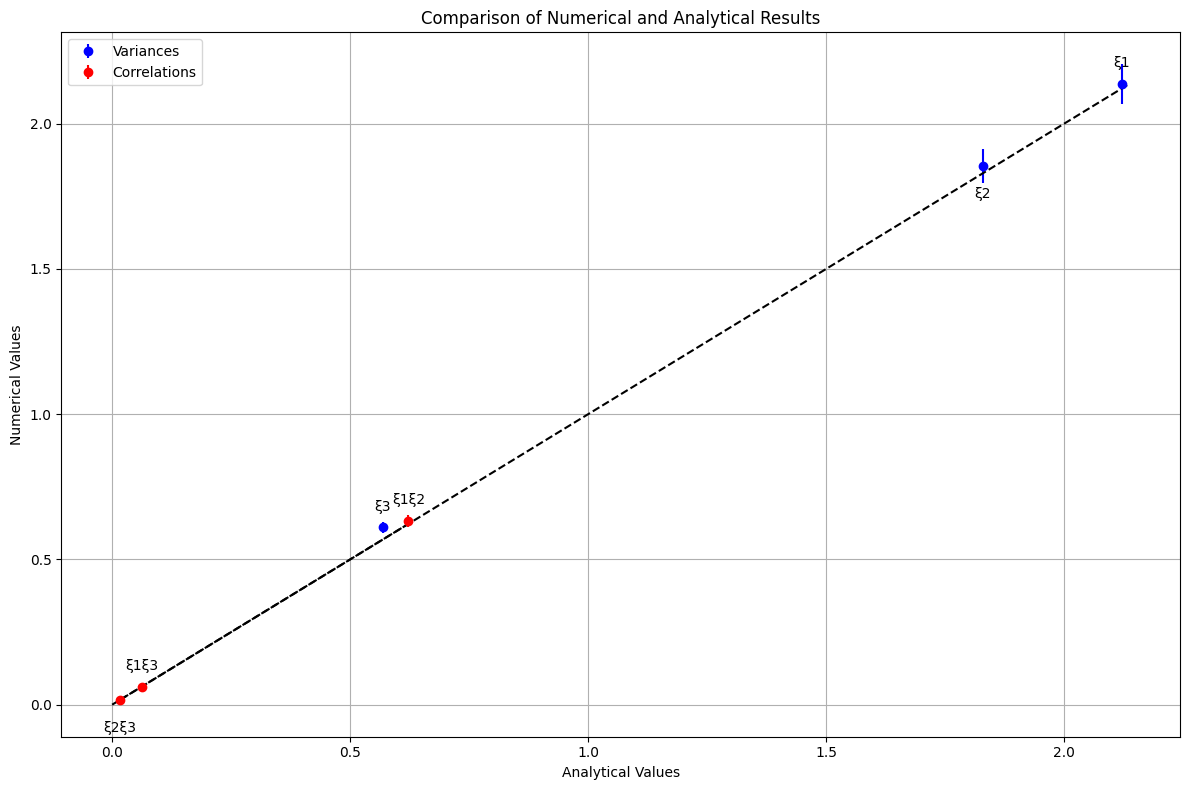

In [ ]:


# Numerical data
variances_numerical = np.array([var_csi1, var_csi2, var_csi3])
correlations_numerical = np.array([sig_csi12, sig_csi23, sig_csi13])

# Analytical data
analytical_variances = np.array([2.12132034, 1.82898878, 0.568485])
analytical_correlations = np.array([0.62255998, 0.0164454, 0.06244584])

# Standard errors
SE_variances_numerical = np.array([SE_var_csi1, SE_var_csi2, SE_var_csi3])
SE_correlations_numerical = np.array([SE_corr_csi12, SE_corr_csi23, SE_corr_csi13])

# Labels for the variables
variance_labels = ['ξ1', 'ξ2', 'ξ3']
correlation_labels = ['ξ1ξ2', 'ξ2ξ3', 'ξ1ξ3']

# Creating the scatter plot
plt.figure(figsize=(12, 8))

# Plotting variances with vertical error bars
plt.errorbar(analytical_variances, variances_numerical, yerr=SE_variances_numerical, fmt='o', color='blue', label='Variances')
for i, txt in enumerate(variance_labels):
    if i % 2 == 0:
        plt.annotate(txt, (analytical_variances[i], variances_numerical[i]), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom')
    else:
        plt.annotate(txt, (analytical_variances[i], variances_numerical[i]), textcoords="offset points", xytext=(0, -15), ha='center', va='top')
plt.plot([0, max(max(analytical_variances), max(variances_numerical))], [0, max(max(analytical_variances), max(variances_numerical))], color='black', linestyle='--')

# Plotting correlations with vertical error bars
plt.errorbar(analytical_correlations, correlations_numerical, yerr=SE_correlations_numerical, fmt='o', color='red', label='Correlations')
for i, txt in enumerate(correlation_labels):
    if i % 2 == 0:
        plt.annotate(txt, (analytical_correlations[i], correlations_numerical[i]), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom')
    else:
        plt.annotate(txt, (analytical_correlations[i], correlations_numerical[i]), textcoords="offset points", xytext=(0, -15), ha='center', va='top')
plt.plot([min(min(analytical_correlations), min(correlations_numerical)), max(max(analytical_correlations), max(correlations_numerical))], [min(min(analytical_correlations), min(correlations_numerical)), max(max(analytical_correlations), max(correlations_numerical))], color='black', linestyle='--')

# Adding details to the graph
plt.title('Comparison of Numerical and Analytical Results')
plt.xlabel('Analytical Values')
plt.ylabel('Numerical Values')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Displaying the plot
plt.show()



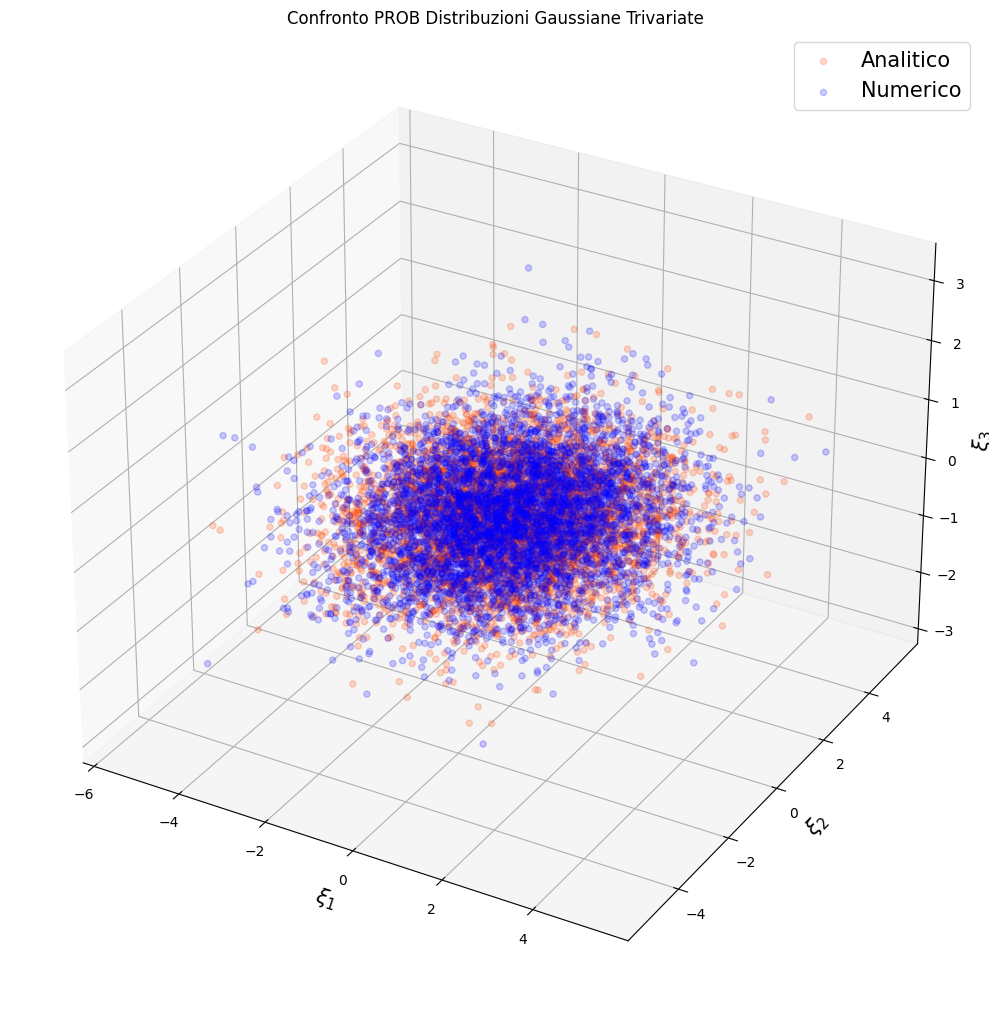

In [ ]:
# I want to compare the analytical and numerical probability cloud of fluctuations
# Taking the Analytical data
# Define the mean values for the analytical distribution
means_analytical = [0, 0, 0]

# Define the covariance matrix for the analytical distribution
cov_matrix_analytical = np.array([
    [2.12132034, 0.62255998, 0.06244584],
    [0.62255998, 1.82898878, 0.0164454],
    [0.06244584, 0.0164454, 0.568485]
])

# Numerical data
# Define the covariance matrix for the numerical distribution
cov_matrix_numerical = np.array([
    [var_csi1, sig_csi12, sig_csi13],
    [sig_csi12, var_csi2, sig_csi23],
    [sig_csi13, sig_csi23, var_csi3]
])

# Generate points for the analytical plot using the multivariate normal distribution
x_analytical, y_analytical, z_analytical = np.random.multivariate_normal(means_analytical, cov_matrix_analytical, 5000).T

# Generate points for the numerical plot using the multivariate normal distribution
x_numerical, y_numerical, z_numerical = np.random.multivariate_normal(means_analytical, cov_matrix_numerical, 5000).T

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the analytical points in 3D space
ax.scatter(x_analytical, y_analytical, z_analytical, color='orangered', alpha=0.2, label='Analytical')

# Plot the numerical points in 3D space
ax.scatter(x_numerical, y_numerical, z_numerical, color='blue', alpha=0.2, label='Numerical')

# Label the axes
ax.set_xlabel('$\\xi_1$', fontsize=15)
ax.set_ylabel('$\\xi_2$', fontsize=15)
ax.set_zlabel('$\\xi_3$', fontsize=15)

# Adjust the layout for better presentation
plt.subplots_adjust(left=0.5, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()

# Add a title to the plot
plt.title('Comparison of Trivariate Gaussian Distributions')

# Add a legend to differentiate between analytical and numerical points
plt.legend(fontsize=15)

# Display the plot
plt.show()

## **  Below Analytical characterization to be compared with numerical results**

In [ ]:
#Stuff to do analytical calculation to conflate with numerical calculation.
# Calculation of the derivative of f with respect to x
def f_prime(x, gam):
    return 2 * x * gam / (gam + x**2)**2

xm= x[1], x[2]

# Calculation of f_prime values for x_vals.
f_prime_vals = np.array([f_prime(xm, gam) for xm in x])

print(f_prime_vals) #check
print(f_prime_vals[2])

# Creating the Jacobian matrix J
J = np.array([
    [-1 + (1 / np.sqrt(N)) * A[0, 0] * f_prime_vals[1], (1 / np.sqrt(N)) * A[0, 1] * f_prime_vals[1], (1 / np.sqrt(N)) * A[0, 2] * f_prime_vals[2]],
    [(1 / np.sqrt(N)) * A[1, 0] * f_prime_vals[1], -1 + (1 / np.sqrt(N)) * A[1, 1] * f_prime_vals[1], (1 / np.sqrt(N)) * A[1, 2] * f_prime_vals[2]],
    [(1 / np.sqrt(N)) * A[2, 0] * f_prime_vals[1], (1 / np.sqrt(N)) * A[2, 1] * f_prime_vals[1], -1 + (1 / np.sqrt(N)) * A[2, 2] * f_prime_vals[2]]
])


print("\nJacobian J matrix with numerical values:")
print(J)

[0.         0.50730594 2.95679568]
2.9567956789604657

Jacobian J matrix with numerical values:
[[-0.70710678  0.          0.        ]
 [ 0.58578644 -1.29289322  0.        ]
 [ 0.1507576   0.         -4.41421356]]


In [ ]:
# # Calculating the matrix of M that i have found analytically
M = np.array([
    [2 * J[0, 0], 0, 0, 2 * J[0, 1], 0, 2 * J[0, 2]],
    [0, 2 * J[1, 1], 0, 2 * J[1, 0], 2 * J[1, 2], 0],
    [0, 0, 2 * J[2, 2], 0, 2 * J[2, 1], 2 * J[2, 0]],
    [J[1, 0], J[0, 1], 0, J[0, 0] + J[1, 1], J[2, 0], J[1, 2]],
    [0, J[2, 1], J[1, 2], J[2, 0], J[1, 1] + J[2, 2], J[0, 1]],
    [J[2, 0], 0, J[0, 2], J[2, 1], J[0, 1], J[0, 0] + J[2, 2]]
])

print("\nMatrix M:")
print(M)


Matrix M:
[[-1.41421356  0.          0.          0.          0.          0.        ]
 [ 0.         -2.58578644  0.          1.17157288  0.          0.        ]
 [ 0.          0.         -8.82842712  0.          0.          0.30151519]
 [ 0.58578644  0.          0.         -2.          0.1507576   0.        ]
 [ 0.          0.          0.          0.1507576  -5.70710678  0.        ]
 [ 0.1507576   0.          0.          0.          0.         -5.12132034]]


In [ ]:
# Calculating the inverse matrix of M
M_inv = np.linalg.inv(M)
print("\ninvese matrix of M:")
print(M_inv)


invese matrix of M:
[[-0.70710678 -0.         -0.         -0.         -0.         -0.        ]
 [-0.09402354 -0.38672954 -0.         -0.22699291 -0.00599619 -0.        ]
 [-0.0007109  -0.         -0.11327046 -0.         -0.         -0.00666874]
 [-0.20751999 -0.         -0.         -0.50099758 -0.01323423 -0.        ]
 [-0.0054818  -0.         -0.         -0.01323423 -0.17556972 -0.        ]
 [-0.02081528 -0.         -0.         -0.         -0.         -0.19526215]]


In [ ]:
#defining the noise vector as i found in analitical calculations
B = np.array([[3, 0, 0],
              [0, 4, 0],
              [0, 0, 5]])
b = np.array([B[0, 0],  # B11
              B[1, 1],  # B22
              B[2, 2],  # B33
              B[0, 1],  # B12
              B[1, 2],  # B23
              B[0, 2]]) # B13

b_column = b.reshape(-1, 1)
print(b_column)

[[3]
 [4]
 [5]
 [0]
 [0]
 [0]]


In [ ]:
#defining the noise vector as i found in analitical calculations, considering a non-diagonal B
B = np.array([[3, 1, 2],
              [1, 4, 3],
              [2, 3, 5]])
# Extract the required elements
B_vector = np.array([B[0, 0],  # B11
                     B[1, 1],  # B22
                     B[2, 2],  # B33
                     B[0, 1],  # B12
                     B[1, 2],  # B23
                     B[0, 2]]) # B13

# Convert to 6x1 column vector
B_vector_column = B_vector.reshape(-1, 1)

print(B_vector_column)

[[3]
 [4]
 [5]
 [1]
 [3]
 [2]]


In [ ]:
# I solve the system to find second and mixed moments.
Sigma = -np.linalg.inv(M)@(b_column)
# Approssimare ogni elemento alla terza cifra decimale

print(Sigma)

[[2.12132034]
 [1.82898878]
 [0.568485  ]
 [0.62255998]
 [0.0164454 ]
 [0.06244584]]


In [ ]:
# I solve the system to find second and mixed moments.
Sigma = -np.linalg.inv(M)@(B_vector_column)

print('Analytical sigma with B non_diagonal\n',Sigma)


Analytical sigma with B non_diagonal
 [[2.12132034]
 [2.07397026]
 [0.58182248]
 [1.16326026]
 [0.5563888 ]
 [0.45297013]]


## First step to generalize B

[[3 1 2]
 [1 4 3]
 [2 3 5]]


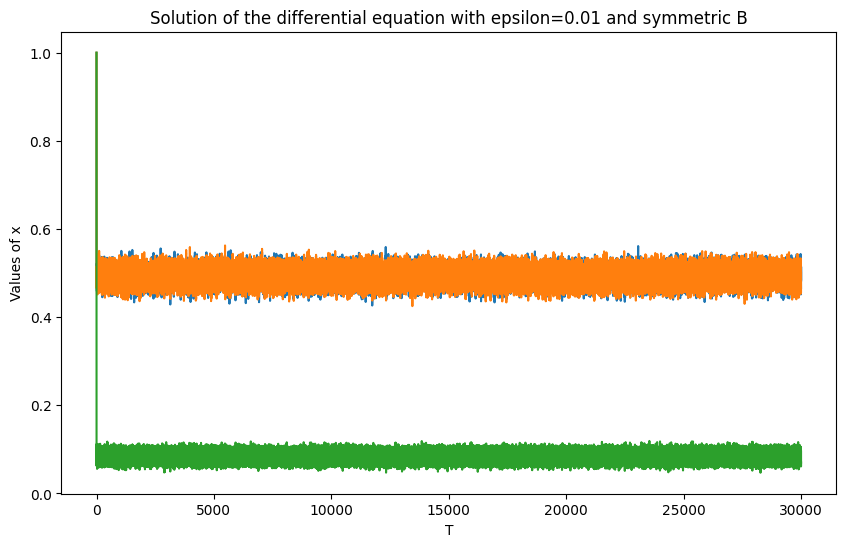

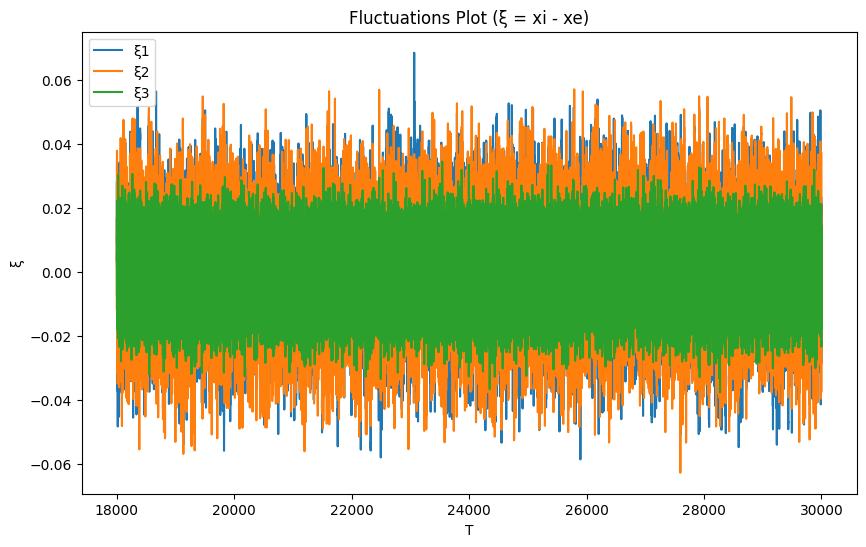

Variance of ξ1: 2.1187592568655402
Variance of ξ2: 2.036410886113073
Variance of ξ3: 0.623291013040326
Correlation between ξ1 and ξ2: 1.0949659095216246
Correlation between ξ2 and ξ3: 0.6057123132675901
Correlation between ξ1 and ξ3: 0.45238105320919547


In [ ]:
# REDO EVERYTHING WITH OFF-DIAGONAL TERMS OF B WHICH MUST BE SYMMETRIC AND SEMIPOSITIVE
import numpy as np
import matplotlib.pyplot as plt

# Define the symmetric matrix B
B = np.array([[3, 1, 2],
              [1, 4, 3],
              [2, 3, 5]])

print(B)

# Parameters for the Euler method
epsilon = 0.01
Iter = 1000000
dt = 0.03  # Delta t


# Define the rate function
def rate(x):
    return x**2 / (gam + x**2)

# Modify the deriv function to use multivariate noise
def deriv(x, A, N, dt, epsilon, B):
    # Generate noise as multivariate Gaussian with covariance B
    noise_term = epsilon * np.sqrt(dt) * np.random.multivariate_normal(np.zeros(N), B)
    dxdt = (-x + (1 / np.sqrt(N)) * (A @ rate(x))) * dt + noise_term
    return dxdt

# Modify euler_method function
def euler_method(A, N, x0, dt, Iter, epsilon, B):
    x_old = np.array(x0)
    x_values = [x_old.copy()]  # History of solutions to store
    for k in range(Iter):
        dxdt = deriv(x_old, A, N, dt, epsilon, B)
        x_new = x_old + dxdt
        x_old = x_new
        x_values.append(x_new.copy())  # Save values
    return np.array(x_values)  # Returns values for plotting



# Execute the Euler method with the new matrix B
x_values = euler_method(A, N, x0, dt, Iter, epsilon, B)

# Time vector
T_values = np.arange(0, (Iter + 1) * dt, dt)

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(T_values, x_values[:, i])

plt.xlabel('T')
plt.ylabel('Values of x')
plt.title("Solution of the differential equation with epsilon=0.01 and symmetric B")
plt.show()

# Associate fixed points with respective nodes
x_e = np.array([x[1], x[1], x[2]])

# Select time t' (e.g., 60% of total time)
t_prime_fraction = 0.6
t_prime = int(Iter * t_prime_fraction)

# Calculate ξ = xi - xe from t'
csi = x_values[t_prime:] - x_e

# Time vector from t'
T_values = np.arange(t_prime, Iter + 1) * dt

colors = ['forestgreen', '#F97306', 'royalblue']

# Visualize results from t'
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(T_values, csi[:, i], color = colors[i], label=f'ξ{i+1}')

plt.xlabel('T')
plt.ylabel('ξ')
plt.title("Fluctuations Plot (ξ = xi - xe)")
plt.legend()
plt.show()

# Calculate the variance of each ξ
var_csi1 = np.var(csi[:, 0]) / (epsilon**2)
var_csi2 = np.var(csi[:, 1]) / (epsilon**2)
var_csi3 = np.var(csi[:, 2]) / (epsilon**2)

# Calculate correlation between ξ1 and ξ2, ξ2 and ξ3, ξ1 and ξ3
sig_csi12 = np.mean(csi[:, 0] * csi[:, 1]) / (epsilon**2)
sig_csi23 = np.mean(csi[:, 1] * csi[:, 2]) / (epsilon**2)
sig_csi13 = np.mean(csi[:, 0] * csi[:, 2]) / (epsilon**2)

print("Variance of ξ1:", var_csi1)
print("Variance of ξ2:", var_csi2)
print("Variance of ξ3:", var_csi3)

print("Correlation between ξ1 and ξ2:", sig_csi12)
print("Correlation between ξ2 and ξ3:", sig_csi23)
print("Correlation between ξ1 and ξ3:", sig_csi13)


## first test, Ode resolution with N=49

x[1], x[2]: 0.12193619865618197 0.02092094420096089


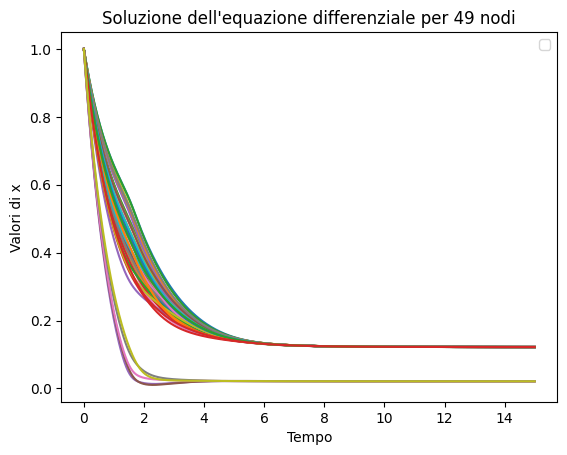

In [ ]:
#First step to generalize

# System parameters
l = 1
N = 49
lambda1 = np.diag([1]*1 + [-1]*24 + [-2]*24)  # Diagonal matrix with eigenvalues of A for 49 nodes

# Parameters
beta = 1 / np.sqrt(N)
gam = (beta**2) / 8

# Initial values calculation
x = np.zeros(3)
def f(x, l, gam):
    return x - l * (x**2 / (gam + x**2))

x[0] = 0
x[1] = (beta*1 + np.sqrt(beta**2*1**2-4*gam))/2
x[2] = (beta*1 - np.sqrt(beta**2*1**2-4*gam))/2

print("x[1], x[2]:", x[1], x[2])

f1 = x[1]**2 / (gam + x[1]**2)
f2 = x[2]**2 / (gam + x[2]**2)

# Creation of the phi matrix and its inverse
first_column = np.array([f1]*44 + [f2]*5)
other_columns = np.random.randn(N, N-1)  # Generate N-1 random columns

phi = np.column_stack((first_column, other_columns))

# Calculation of the inverse of phi
phi_ = np.linalg.inv(phi)

# Verify the identity
check = phi @ phi_

A_at = phi @ lambda1 @ phi_

# Parameters for the Euler method
x0 = np.ones(N)  # Initial conditions, array of length N with all ones
dt = 0.03  # Delta t
iterations = 500  # Number of iterations

def rate(x):
    return x**2 / (gam + x**2)

def deriv(x, A, N):
    dxdt = -x + (1 / np.sqrt(N)) * (A @ rate(x))
    return dxdt

def euler_method(A, N, x0, dt, iterations):
    x_old = np.array(x0)
    x_values = [x_old.copy()]  # History of solutions to store
    for k in range(iterations):
        dxdt = deriv(x_old, A, N)
        x_new = x_old + dxdt * dt
        x_old = x_new
        x_values.append(x_new.copy())  # Save values
    return np.array(x_values)  # Return values for plotting

# Solving the differential equation
x_values = euler_method(A_at, N, x0, dt, iterations)

# Time vector
T_values = np.arange(0, (iterations + 1) * dt, dt)

# Visualization of results
for i in range(N):
    plt.plot(T_values, x_values[:, i])

plt.xlabel('Time')
plt.ylabel('Values of x')
plt.legend()
plt.title("Solution of the differential equation for 49 nodes")
plt.show()
